In [63]:
 # Pandas
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import numpy as np

# SQL Alchemy
from sqlalchemy import create_engine

from readDB import hostname, username, password


import psycopg2

con = psycopg2.connect(database="employeesHW_db", user=username, 
                       password=password, host=hostname, port="5432")

print('''-----
Database opened successfully
-----''')

-----
Database opened successfully
-----


In [64]:
#Test that I pulled in my DB 
salary_data = pd.read_sql("SELECT * FROM salaries", con)
salary_data.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


# Histogram: 
Create a histogram to visualize the most common salary ranges for employees.

In [142]:
#I am going to try to bin this information and then plot to a histogram.
#binsalary=[0,25000,50000,75000,100000,125000,150000,200000]
#binnames=['0 to 25000','25000 to 50000','50000 to 75000', '75000 to 100000','100000 to 125000',
         #'125000 to 150000','150000 to 200000']
#salary_data['salary ranges']= pd.cut(salary_data["salary"], binsalary, labels=binnames)
#salary_data.drop(['salary ranges (in thousands)'], axis = 1)

Text(0.5, 1.0, 'Salary Range Frequency')

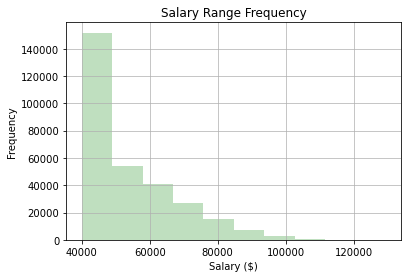

In [153]:
#y = salary_data['salary ranges'].value_counts()
#x = salary_data['salary ranges'].unique()
salary_data.hist(column='salary', color = 'g', alpha = .25, rwidth = 1)
plt.grid(alpha=0.9)
plt.xlabel('Salary ($)')
plt.ylabel('Frequency')
plt.title('Salary Range Frequency')

# Bar chart:
Create a bar chart of average salary by title.

In [ ]:
#likely will have to merge title with employees, then salary with employees and run from there
# I can then do a groupby for title and average out the values. 

In [168]:
#bring in title and employees, connect them on emp_title_id
title_data = pd.read_sql("SELECT * FROM title", con)
emp_data = pd.read_sql('select * from employees',con)
title_data

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [177]:
#rename emp_title_id to title_id in employees then merge. 
new_emp_data = emp_data.rename(columns={'emp_title_id':'title_id'})

In [224]:
merge = pd.merge(new_emp_data,title_data, how = 'inner', on= "title_id")
merge2 = pd.merge(merge, salary_data, how = 'inner', on = 'emp_no')
clean_merged = merge2.drop(['salary ranges (in thousands)','salary ranges'], axis = 1)
avg_sal_title = clean_merged.groupby('title')['salary'].mean()
avg_sal_title.round(2)


title
Assistant Engineer    48564.43
Engineer              48535.34
Manager               51531.04
Senior Engineer       48506.80
Senior Staff          58550.17
Staff                 58465.38
Technique Leader      48582.90
Name: salary, dtype: float64

(38506.79987109579, 63550.17270435993)

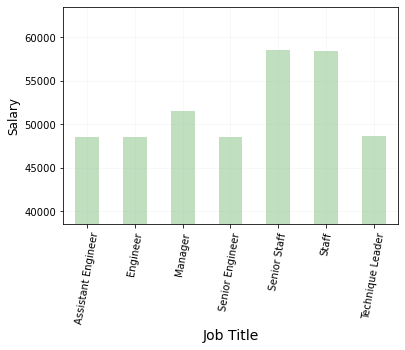

In [274]:
barchart = avg_sal_title.plot.bar(align = 'center', color = 'g', rot=80, alpha = .25, grid = True)
plt.grid(alpha=0.1)
plt.xlabel('Job Title', size = 14)
plt.ylabel('Salary', size = 12)
plt.ylim(min(avg_sal_title)-10000, max(avg_sal_title)+5000)